# #Field Factory

In [1]:
import numpy as np
%load_ext autoreload
%autoreload 2
import rspie as rs
from matplotlib import pyplot as plt
import cmasher as cm
import os

In [26]:
# xmin, xmax = -2.5, 2.5
# ymin, ymax = -5  , 5
# simulation_resolution = 0.1
# wavelength = 0.6
# sampling_resolution = simulation_resolution / 2
# num_elements_x      = int((xmax - xmin)/sampling_resolution + 1)
# num_elements_y      = int((ymax - ymin)/sampling_resolution + 1)
# x = np.linspace(xmin, xmax, num_elements_x)
# y = np.linspace(ymin, ymax, num_elements_y)
# xg, yg = np.meshgrid(x, y)
# field  = 1/(xg**2 + yg**2 + 1)
# header = '''/rn,a,b/nx0/ls1
# /r,qa,qb
# {num_elements_x} {xmin} {xmax} 0 OUTPUT_AMPLITUDE_3D Wavelength={wavelength}
# {num_elements_y} {ymin} {ymax}'''.format(num_elements_x=num_elements_x, num_elements_y=num_elements_y, xmin=xmin, xmax=xmax, ymin=ymin, ymax=ymax, wavelength=wavelength)

In [27]:
# rs.save_2D_array_to_dat('D:/Zia_Lab/Codebase/rspie/dummy_file.dat', 
#                         field, wavelength, xmin, xmax, ymin, ymax)

## ##Dipole field in -> fullWave SIM -> difieldout

In [29]:
xmin, xmax = -2.5, 2.5
ymin, ymax = -5  , 5
simulation_resolution = 0.1
wavelength = 0.5
sampling_resolution = simulation_resolution / 2
num_elements_x      = int((xmax - xmin)/sampling_resolution + 1)
num_elements_y      = int((ymax - ymin)/sampling_resolution + 1)
x = np.linspace(xmin, xmax, num_elements_x)
y = np.linspace(ymin, ymax, num_elements_y)
xg, yg = np.meshgrid(x, y)
xd, yd, zd = 0, 0, -3
omega = 2
theta, phi = np.pi, 0
field  = rs.dipole_field(xg, yg, 0, xd, yd, zd, theta, phi, omega)

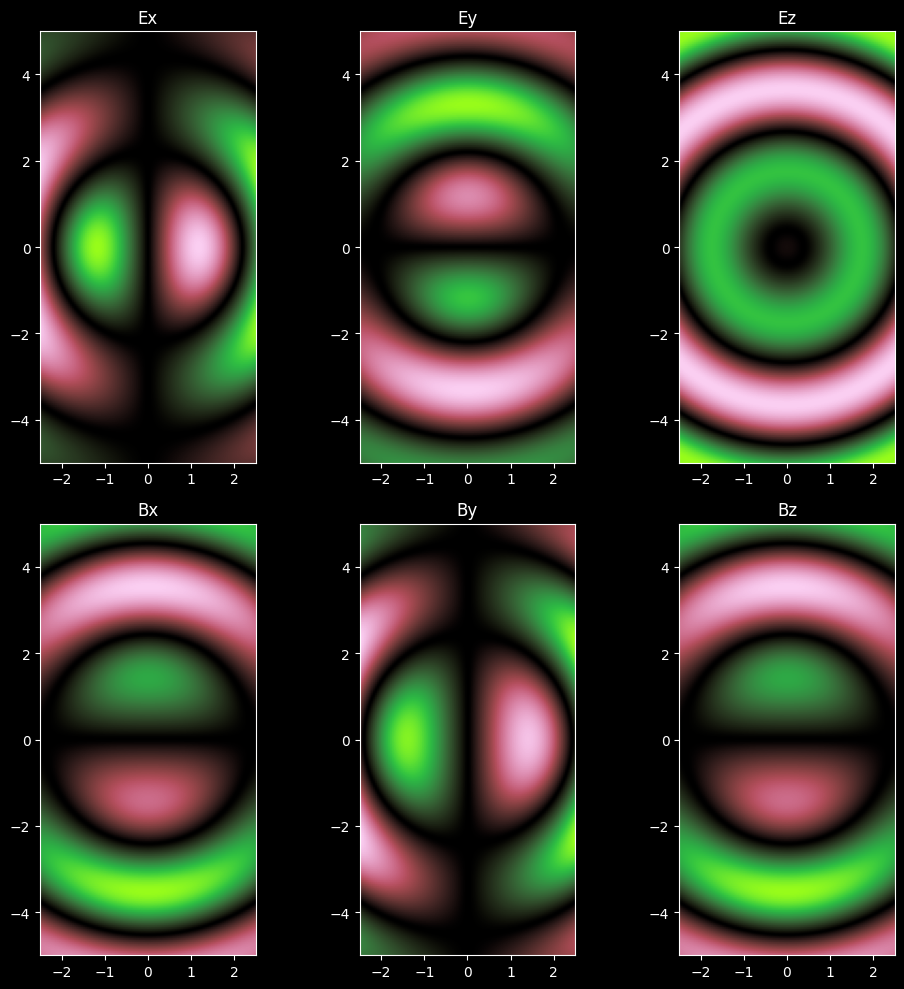

In [31]:
field_names = ['Ex','Ey','Ez','Bx','By','Bz']
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(10,10))
for i in range(6):
    axes[i//3, i%3].imshow(field[i], cmap=cm.watermelon, extent=[xmin, xmax, ymin, ymax], origin='lower')
    axes[i//3, i%3].set_title(field_names[i])
plt.tight_layout()
plt.show()

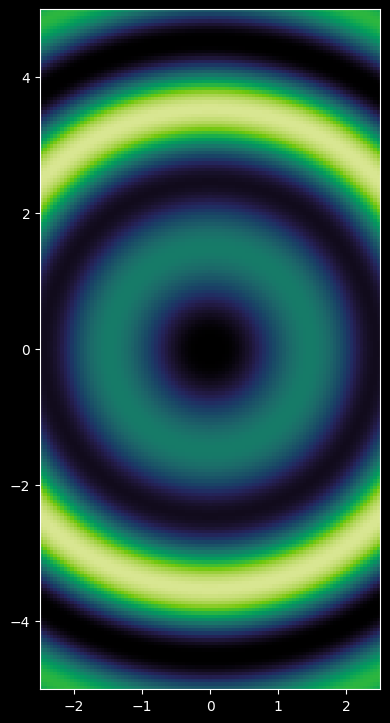

In [32]:
e_density = field[0]**2 + field[1]**2 + field[2]**2
plt.figure(figsize=(4,10))
plt.imshow(e_density, cmap=cm.toxic,
        extent=[xmin, xmax, ymin, ymax],
        origin='lower')
plt.tight_layout()
plt.show()

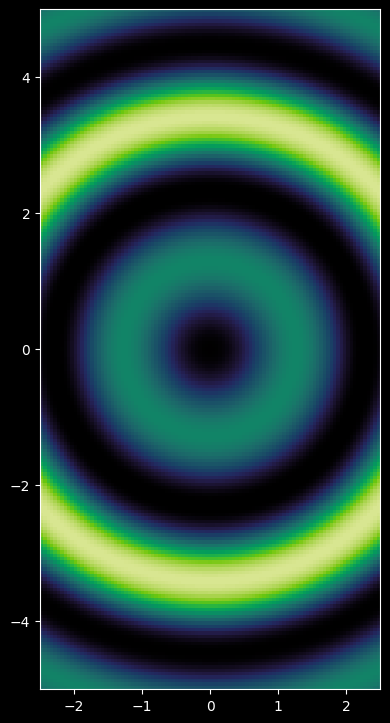

In [33]:
 
pointz = field[0]*field[4] - field[1]*field[3]
plt.figure(figsize=(4,10))
plt.imshow(pointz, cmap=cm.toxic,
        extent=[xmin, xmax, ymin, ymax],
        origin='lower')
plt.tight_layout()
plt.show()

In [87]:
xmin, xmax = -5, 5
ymin, ymax = -5  , 5
simulation_resolution = 0.1
wavelength = 0.5
sampling_resolution = simulation_resolution / 2
num_elements_x      = int((xmax - xmin)/sampling_resolution + 1)
num_elements_y      = int((ymax - ymin)/sampling_resolution + 1)
x = np.linspace(xmin, xmax, num_elements_x)
y = np.linspace(ymin, ymax, num_elements_y)
xg, yg = np.meshgrid(x, y)
xd, yd, zd = 0, 0, -100
omega = 2*np.pi/wavelength
theta, phi = np.pi/2, 0
z = 0
field  = rs.dipole_field(xg, yg, z, xd, yd, zd, theta, phi, omega)
# export to use as input fields
field_names = ['Ex','Ey','Ez','Bx','By','Bz']
for idx, field_name in enumerate(field_names):
    afield = field[idx]
    fname = 'D:/Zia_Lab/Codebase/rspie/dipf_{}.dat'.format(field_name.lower())
    rs.save_2D_array_to_dat(fname, 
                        afield, wavelength, xmin, xmax, ymin, ymax)

In [83]:
# run simulation

In [88]:
fname = 'D:/Zia_Lab/Codebase/rspie/out_m2_f2_ex.dat'
dip_field_out = rs.load_2d_dat(fname)[2]

In [103]:
z = 0
ofield  = rs.dipole_field(xg, yg, z, xd, yd, zd, theta, phi, omega)

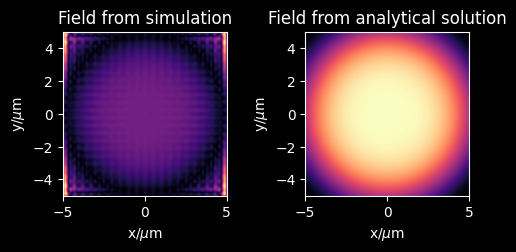

In [104]:
fig, axes = plt.subplots(ncols=2,figsize=(5,10))
axes[0].imshow(dip_field_out, 
    cmap='magma',
    origin='lower',
    extent= [xmin, xmax, ymin, ymax])
axes[0].set_title('Field from simulation')
axes[1].imshow(ofield[0], 
    cmap='magma',
    origin='lower',
    extent= [xmin, xmax, ymin, ymax])
axes[1].set_title('Field from analytical solution')
for ax in axes:
    ax.set_xlabel('x/$\mu$m')
    ax.set_ylabel('y/$\mu$m')
plt.tight_layout()
plt.show()

In [105]:
np.sum(dip_field_out * ofield[0])/np.sqrt(np.sum(dip_field_out**2) * np.sum(ofield[0]**2))

0.651648673801753